# Exercise 07 Clustering I

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

### K-Means Clustering

In this exercise, we will perform K-Means clustering with the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

Unlike the exercises we've done before:
- Regression: predict the median house value for different California districts
- Classification: classify California districts into different categories with different median house value
We will perform clustering with this dataset to see if there are natrual clusters among different California districts and what does these clusters represent.

First, let's load the dataset.

In [14]:
# load the dataset
feature_df, target_df = datasets.fetch_california_housing(return_X_y = True, as_frame = True)
# merge the features and target into one DataFrame for the following clustering
data_df = feature_df.copy()
data_df['MedHouseVal'] = target_df
data_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<span style="color:red">**[TBC]**</span> As we already loaded the dataset, please complete the following tasks:
- Data exploration
- Data pre-processing
- K-Means clustering
- Interpret clustering results

### Task 1. Data exploration

<span style="color:red">**[TBC]**</span> Perform data exploration to see if there is a need for:
- Eliminate records with missing-values
- Eliminate highly correlated features
- Eliminate irrelevant / useless features
- Feature scaling
- Eliminate outliers

In [15]:
data_df.info()
data_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


20640 instances on the dataset without missing values

In [16]:
# [TBC] complete your code here with proper comments
# display the descriptive statistics of numeric variables
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Explanation of the columns in the California housing dataset:

MedInc: This is the median income in the block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. It typically has a population of 600 to 3,000 people.

HouseAge: This is the median house age in the block group.

AveRooms: This is the average number of rooms per household.

AveBedrms: This is the average number of bedrooms per household.

Population: This is the total population in the block group.

AveOccup: This is the average number of household members.

Latitude: This is the block group’s latitude

In [17]:
# display the correlation matrix between numeric variables
corr = data_df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


There is an strong correlation between AveRooms and AVeBedrms, because normally increasing rooms in a house would increase necesary bedrooms on the same house


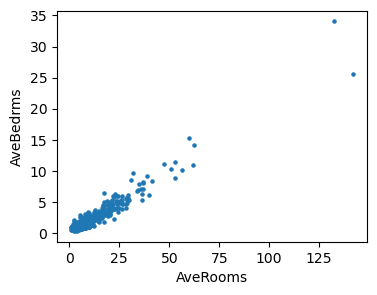

In [18]:
print("There is an strong correlation between AveRooms and AVeBedrms, because normally increasing rooms in a house would increase necesary bedrooms on the same house")

data_df.plot.scatter(
    x = 'AveRooms',
    y = 'AveBedrms',
    figsize = (4, 3),
    marker = '.'
)
plt.show()

In [19]:
correlation_matrix = data_df.corr()
# You can set a threshold for correlation values and remove features with high correlation
threshold = 0.7  # Adjust this threshold as needed
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

data_df.drop(highly_correlated_features, axis=1, inplace=True)

In [20]:
data_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


In [11]:
# Replace '<list_of_irrelevant_features>' with the actual feature names you want to remove
"""
irrelevant_features = ['Population', 'AveOccup', 'Latitude']  # Modify this list with your irrelevant feature names
data_df.drop(irrelevant_features, axis=1, inplace=True)
"""

### Task 2. Data preprocessing

<span style="color:red">**[TBC]**</span> Depending on the conclusions you got from data exploration, preproces the dataset.

In [22]:
# [TBC] complete your code here with proper comments
# Feauture Scaling

scaler = MinMaxScaler()
data_df_scaled = scaler.fit_transform(data_df)
data_df = pd.DataFrame(data_df_scaled, columns=data_df.columns)

data_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.008941,0.001499,0.567481,0.902266
1,0.538027,0.392157,0.038224,0.067210,0.001141,0.565356,0.708247
2,0.466028,1.000000,0.052756,0.013818,0.001698,0.564293,0.695051
3,0.354699,1.000000,0.035241,0.015555,0.001493,0.564293,0.672783
4,0.230776,1.000000,0.038534,0.015752,0.001198,0.564293,0.674638
...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023599,0.001503,0.737513,0.130105
20636,0.141853,0.333333,0.037344,0.009894,0.001956,0.738576,0.128043
20637,0.082764,0.313725,0.030904,0.028140,0.001314,0.732200,0.159383
20638,0.094295,0.333333,0.031783,0.020684,0.001152,0.732200,0.143713


### Task 3. K-Means clustering

<span style="color:red">**[TBC]**</span> Perform K-Means clustering with the pre-processed dataset. Select the value of K through the elbow method.

In [23]:
# [TBC] complete your code here with proper comments
# K-Means clustering
X = data_df.values
model = KMeans(
    n_clusters = 10, # 10 clusters
    n_init = 'auto', # multiple attempt with different initial centroids
    random_state = 1, # fix ramdom state to guarantee reproducibility
    verbose = 1 # output log
)
model.fit(X)

Initialization complete
Iteration 0, inertia 1157.6446174284574.
Iteration 1, inertia 987.724645272171.
Iteration 2, inertia 965.8274656535873.
Iteration 3, inertia 956.6134329009121.
Iteration 4, inertia 948.4585639285646.
Iteration 5, inertia 940.0494207984738.
Iteration 6, inertia 933.7902255184936.
Iteration 7, inertia 929.7005330262114.
Iteration 8, inertia 927.7001737883758.
Iteration 9, inertia 926.7264955953851.
Iteration 10, inertia 926.106029323523.
Iteration 11, inertia 925.6698729364898.
Iteration 12, inertia 925.3955410974884.
Iteration 13, inertia 925.1859902851551.
Iteration 14, inertia 924.9937100118561.
Iteration 15, inertia 924.8974210427493.
Iteration 16, inertia 924.802912013793.
Iteration 17, inertia 924.724803991515.
Iteration 18, inertia 924.6645642725073.
Iteration 19, inertia 924.6343337092472.
Iteration 20, inertia 924.6070936664296.
Iteration 21, inertia 924.5767597630975.
Iteration 22, inertia 924.5380563082203.
Iteration 23, inertia 924.5032042305288.
Itera

KMeans(n_clusters=10, n_init='auto', random_state=1, verbose=1)

In [24]:
# obtain the cluster centers
model.cluster_centers_

array([[0.15161119, 0.74480481, 0.03031731, 0.02831656, 0.00234287,
        0.5760771 , 0.21033027],
       [0.19003667, 0.27216292, 0.03154387, 0.05528621, 0.00186374,
        0.13910077, 0.26258148],
       [0.29379666, 0.7536382 , 0.03206022, 0.0282404 , 0.00170778,
        0.14978614, 0.77939074],
       [0.17915306, 0.3193946 , 0.03567667, 0.04067276, 0.00174706,
        0.60616492, 0.21533752],
       [0.31752022, 0.39674314, 0.03679377, 0.04469904, 0.00172325,
        0.54104563, 0.54497032],
       [0.14879333, 0.79590308, 0.02579628, 0.03405746, 0.00218771,
        0.15653474, 0.25885658],
       [0.60440818, 0.5408018 , 0.0464515 , 0.035044  , 0.00167217,
        0.31440059, 0.97123078],
       [0.26813164, 0.87643416, 0.03238751, 0.02992223, 0.00160391,
        0.54540325, 0.64676652],
       [0.35314619, 0.30247426, 0.03902023, 0.05171926, 0.00172991,
        0.13669259, 0.60024764],
       [0.21512337, 0.58370696, 0.02884624, 0.04159353, 0.00200486,
        0.14339007, 0.3

In [25]:
# obtain clustering results
model.labels_

array([6, 4, 7, ..., 3, 3, 3])

In [26]:
# obtain the inertia
model.inertia_

924.3992110145623

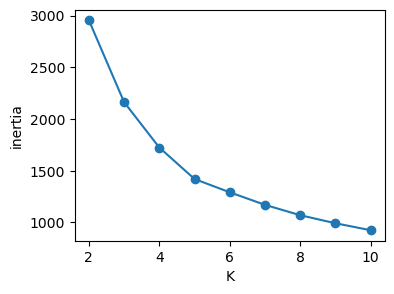

In [27]:
# create an empty list to store inertia
inertia =[]

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    inertia.append(model.inertia_)

# plot k vs inertia
plt.figure(figsize = (4, 3))
plt.plot(range(2, 11), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

It can not be seen a clear break point on the Elbow

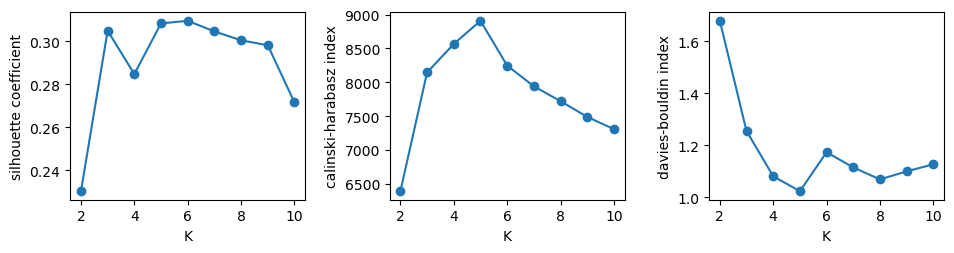

In [28]:
# create an empty list to store silhouette coefficient
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model.labels_))

# plot k vs silhouette coefficient
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
fig.tight_layout(pad = 3)
axs[0].plot(range(2, 11), silhouette, marker = 'o')
axs[0].set_xlabel('K')
axs[0].set_ylabel('silhouette coefficient')
axs[1].plot(range(2, 11), calinski_harabasz, marker = 'o')
axs[1].set_xlabel('K')
axs[1].set_ylabel('calinski-harabasz index')
axs[2].plot(range(2, 11), davies_bouldin, marker = 'o')
axs[2].set_xlabel('K')
axs[2].set_ylabel('davies-bouldin index')
plt.show()

In this case, according to most metrics it can be selected K = 5, just according to calinski_harabasz and davies_bouldin graphs

### Task 4. Interpret clustering results

<span style="color:red">**[TBC]**</span> Try to interpret the clustering results using visualization or other methods. Please describe the characteristics of the clusters you've got and which type of districts each cluster represent.

In [43]:
# [TBC] complete your code here with proper comments
# reconstruct the clustering model with k=6
model = KMeans(
    n_clusters = 5,
    n_init = 'auto',
    random_state = 1,
    verbose = 1
)
model.fit(X)

Initialization complete
Iteration 0, inertia 2120.455528898215.
Iteration 1, inertia 1732.5274327302668.
Iteration 2, inertia 1635.5409332210231.
Iteration 3, inertia 1594.9586705462798.
Iteration 4, inertia 1577.80392247018.
Iteration 5, inertia 1570.2128142945376.
Iteration 6, inertia 1565.953897981552.
Iteration 7, inertia 1561.5853225382916.
Iteration 8, inertia 1556.236771628972.
Iteration 9, inertia 1548.1201317345733.
Iteration 10, inertia 1534.7521362116609.
Iteration 11, inertia 1515.4316959330372.
Iteration 12, inertia 1488.8224958210774.
Iteration 13, inertia 1465.7466199754524.
Iteration 14, inertia 1451.2777618917062.
Iteration 15, inertia 1437.180419917891.
Iteration 16, inertia 1427.9543481209198.
Iteration 17, inertia 1423.5867365024665.
Iteration 18, inertia 1421.340731211.
Iteration 19, inertia 1420.363612528807.
Iteration 20, inertia 1420.0272633404434.
Iteration 21, inertia 1419.9068248483286.
Iteration 22, inertia 1419.8525857694644.
Iteration 23, inertia 1419.8286

KMeans(n_clusters=5, n_init='auto', random_state=1, verbose=1)

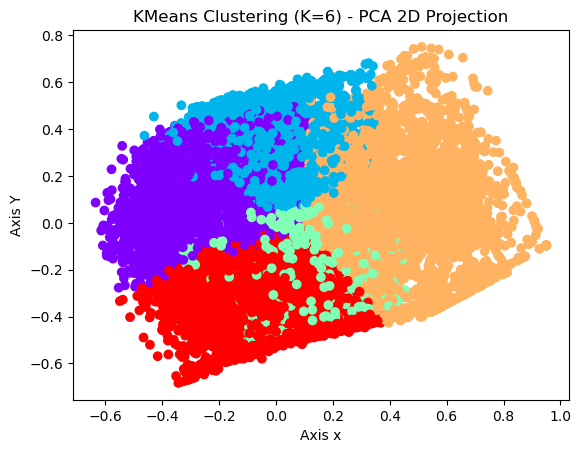

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already fit the KMeans model to your data and stored it in 'model'
# X is your 7D data

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(data_df)

# Get the cluster labels assigned by KMeans
cluster_labels = model.labels_

# Create a scatter plot to visualize the clusters
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('KMeans Clustering (K=6) - PCA 2D Projection')
plt.xlabel('Axis x')
plt.ylabel('Axis Y')
plt.show()

In [45]:

import plotly.express as px
import plotly.io as pio
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you have already fit the KMeans model to your data and stored it in 'model'
# X is your 7D data

# Reduce the data to 3D using PCA
pca = PCA(n_components=3)
X_3d = pca.fit_transform(data_df)

# Create a DataFrame with the 3D data and cluster labels
df_3d = pd.DataFrame({'PC1': X_3d[:, 0], 'PC2': X_3d[:, 1], 'PC3': X_3d[:, 2], 'Cluster': model.labels_})

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='KMeans Clustering (K=6) - PCA 3D Projection')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.show()

In [46]:
# formalize cluster centroids
cluster_centers = pd.DataFrame(
    model.cluster_centers_,
    columns = data_df.columns
)
cluster_centers

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,0.209194,0.337229,0.035702,0.042214,0.001760,0.586763,0.282074
1,0.238685,0.309429,0.033045,0.054252,0.001835,0.135621,0.365418
2,0.183163,0.707080,0.027405,0.036437,0.002077,0.151188,0.318623
3,0.406478,0.619946,0.038626,0.033442,0.001644,0.303522,0.845842
4,0.179836,0.785217,0.030399,0.028581,0.002196,0.568625,0.308887


In [48]:
# define a new customer
attemp = pd.DataFrame(
    {
        'MedInc': [	0.183163],
        'HouseAge': [0.707080],
        'AveRooms': [0.027405],
        'Population': [0.042214],
        'AveOccup': [0.002077],
        'Latitude': [0.151188],
        'MedHouseVal': [0.845842],
    }
)
attemp

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,0.183163,0.70708,0.027405,0.042214,0.002077,0.151188,0.845842


In [49]:
# assign this customer into one cluster
model.predict(attemp.values)

array([3])